# Use Fourier analysis to predict the tide

Data (Calliaqua, St Vincent and the Grenadines, hourly) downloaded from here:
    https://psmsl.org/cme/downloaddata.php

Use first half of data to do Fourier analysis.
Use the remaining data as validation

at d[ 6532 ]= [0.579] , it's the cycle
N_train= 200 N_vali= 400
T.shape =  (400,) w.shape =  (200,)
103 out of 200 terms of Fourier series are used.


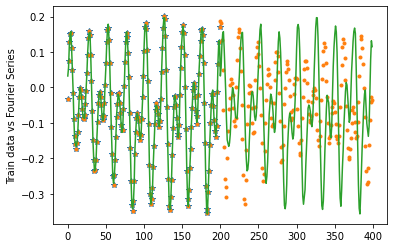

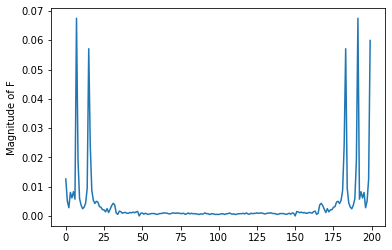

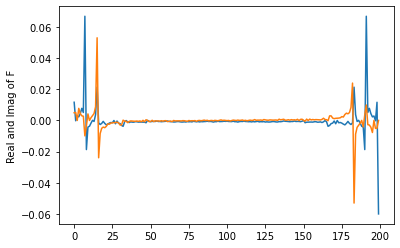

In [6]:
import pandas as pd
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

def load_tide_data(f):
    # use Pandas to read data and then convert to a numpy array
    d = pd.read_csv(f, header=None).to_numpy()
    return d

def fourier_coeff(w, d):
    d = d.flatten()
    T = np.array(list(range(0, d.shape[0])))
    e = np.exp(np.multiply(T, 1j*w*2*math.pi))
    fourier_a_b = sum(np.multiply(e, d)) / d.shape[0]
    
    # return fourier_integral.real, fourier_integral.imag
    return fourier_a_b

def find_cycle(d, N):
    cycle_flag = 0
    for m in range(N, d.shape[0]-N):
        # print("in for loop, m=", m, "d[m]=", d[m])
        n = 0
        while abs(d[n] - d[m+n]) < 0.03 and n < N:
            n = n + 1
        if n == N:
            cycle_flag = 1
            break
    print("at d[", m, "]=", d[m], ", it's the cycle")
    
def main():
    d = load_tide_data('calq_rad_processed.csv')
    find_cycle(d, 10)
    d_mean = np.mean(d)
    d = d - d_mean    
    
    N_train = 200 ################
    
    N_vali = N_train * 2
    d_train = d[0:N_train]
    d_vali = d[0:N_vali]
    print("N_train=", N_train, "N_vali=", N_vali)
    T = np.array(list(range(0, d_vali.shape[0])))
    
    w = np.arange(1, d_train.shape[0]+1, 1) / d_train.shape[0]
    print("T.shape = ", T.shape, "w.shape = ", w.shape)
    F = np.full(w.shape[0], 0j)
    d_predict = 0 * d_vali.flatten()
    terms_count = 0
    for k in range(0, w.shape[0]):
        F[k] = fourier_coeff(w[k], d_train)
        if (np.abs(F[k]) > 0.001):
            # print("k=", k, ", w[", k, "]=", w[k], ", F[", k, "]=", F[k])
            d_predict = d_predict + F[k].real * np.cos(T*w[k]*2*np.pi)
            d_predict = d_predict + F[k].imag * np.sin(T*w[k]*2*np.pi)
            terms_count = terms_count + 1
    
    print(terms_count, "out of", w.shape[0], "terms of Fourier series are used.")
    # print("w[20] = ", w[20], "w[40] = ", w[40])
    plt.plot(d_train, '*')
    plt.plot(d_vali, '.')
    plt.plot(d_predict)
    plt.ylabel('Train data vs Fourier Series')
    plt.show()
    
    plt.plot(np.abs(F))
    plt.ylabel('Magnitude of F')
    plt.show()
    
    plt.plot(F.real)
    plt.plot(F.imag)
    plt.ylabel('Real and Imag of F')
    plt.show()
    
if __name__ == "__main__":
    main()

